In [2]:
!pip install rdkit-pypi
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw

In [3]:
df = pd.read_csv("D:\\My Programming\\tox21trainingdata.sdf\\updated_dataset.csv")

In [4]:
print(df.head())

              Name  MolWeight  \
0  NCGC00178831-03    468.992   
1  NCGC00166114-03    691.859   
2  NCGC00263563-01    934.171   
3  NCGC00013058-02    927.020   
4  NCGC00167516-01   1342.527   

                                              SMILES  toxicity_score  
0  C[n+]1c2cc(N)ccc2cc2ccc(N)cc21.Nc1ccc2cc3ccc(N...         1.53830  
1  O=C([O-])c1ccccc1-c1c2cc(Br)c(=O)c(Br)c-2oc2c(...        -0.94010  
2  CO[C@@H]1[C@@H](OC)[C@H](C)[C@@](O)(CC(=O)[O-]...         3.35840  
3  CN(C)c1ccc(C(=C2C=CC(=[N+](C)C)C=C2)c2ccccc2)c...         3.58460  
4  CC(=O)O.CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(=...        -0.45963  


In [5]:
print(df.describe())

          MolWeight  toxicity_score
count  11759.000000    11759.000000
mean     287.319532        2.115577
std      167.815611        2.595733
min       30.026000      -31.312400
25%      172.314000        0.928250
50%      255.301000        2.265020
75%      356.560000        3.570120
max     1950.681000       22.611800


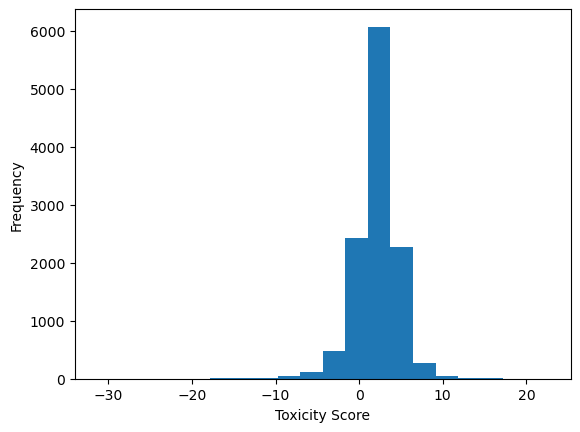

In [6]:
plt.hist(df['toxicity_score'], bins=20)
plt.xlabel('Toxicity Score')
plt.ylabel('Frequency')
plt.show()

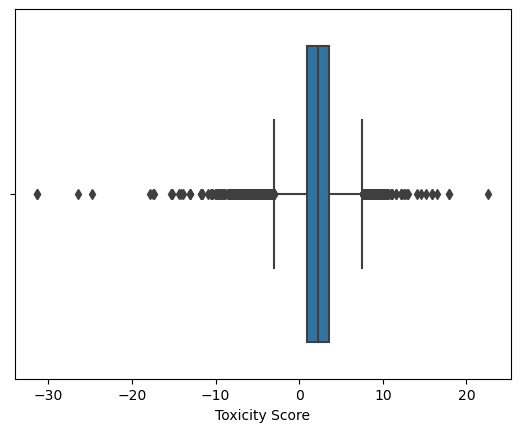

In [7]:
sns.boxplot(x=df['toxicity_score'])
plt.xlabel('Toxicity Score')
plt.show()

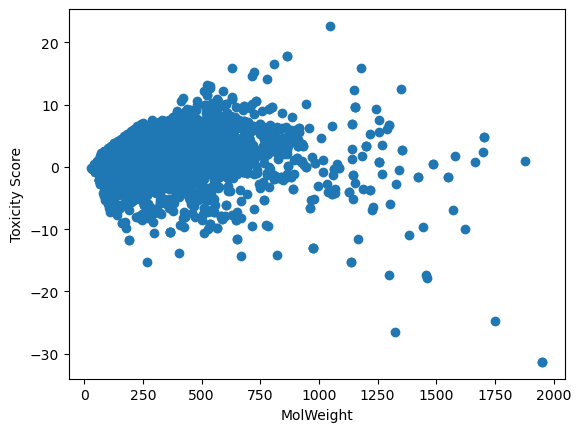

In [8]:
plt.scatter(df['MolWeight'], df['toxicity_score'])
plt.xlabel('MolWeight')
plt.ylabel('Toxicity Score')
plt.show()

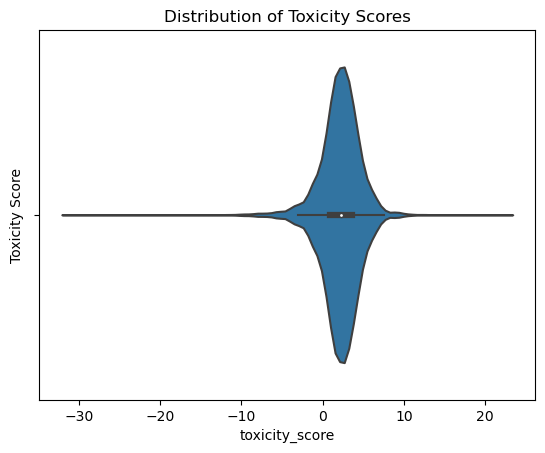

In [9]:
sns.violinplot(x=df["toxicity_score"])
plt.title('Distribution of Toxicity Scores')
plt.ylabel('Toxicity Score')
plt.show()


In [10]:
df=df.dropna()

In [11]:
q1 = df['toxicity_score'].quantile(0.25)
q3 = df['toxicity_score'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
outliers = df[(df['toxicity_score'] < lower_limit) | (df['toxicity_score'] > upper_limit)]


In [12]:
df = df[(df['toxicity_score'] >= lower_limit) & (df['toxicity_score'] <= upper_limit)]

In [13]:
z_scores = (df['toxicity_score'] - df['toxicity_score'].mean()) / df['toxicity_score'].std()

In [14]:
threshold = 3

In [15]:
df_no_outliers = df.loc[abs(z_scores) <= threshold]

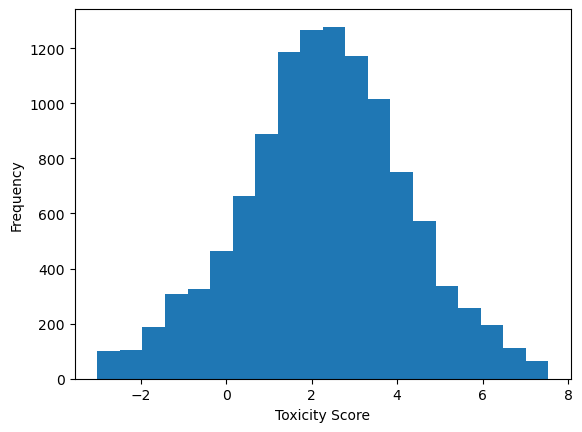

In [16]:
plt.hist(df['toxicity_score'], bins=20)
plt.xlabel('Toxicity Score')
plt.ylabel('Frequency')
plt.show()

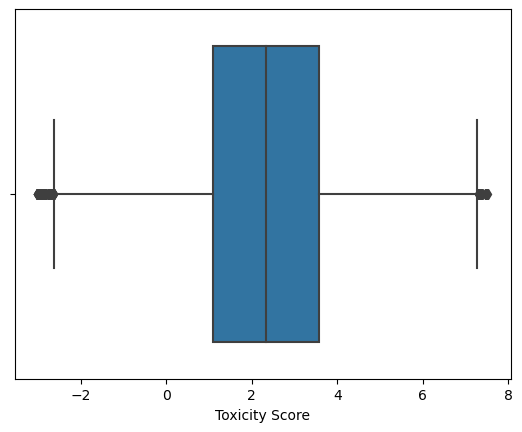

In [17]:
sns.boxplot(x=df['toxicity_score'])
plt.xlabel('Toxicity Score')
plt.show()

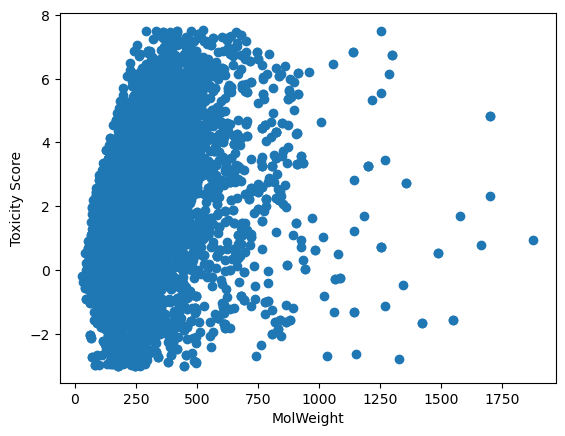

In [18]:
plt.scatter(df['MolWeight'], df['toxicity_score'])
plt.xlabel('MolWeight')
plt.ylabel('Toxicity Score')
plt.show()

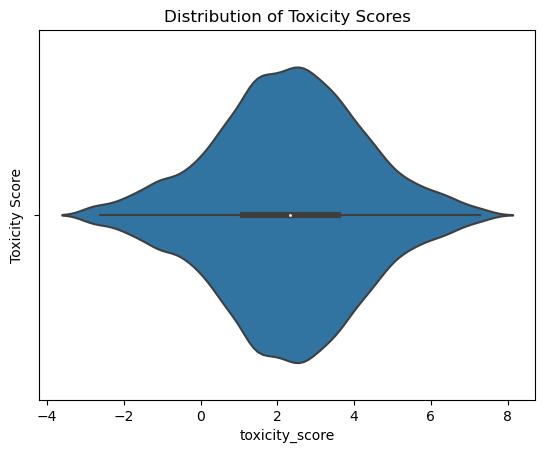

In [19]:
sns.violinplot(x=df["toxicity_score"])
plt.title('Distribution of Toxicity Scores')
plt.ylabel('Toxicity Score')
plt.show()


In [23]:
df = df[(df['MolWeight'] < 1000)]

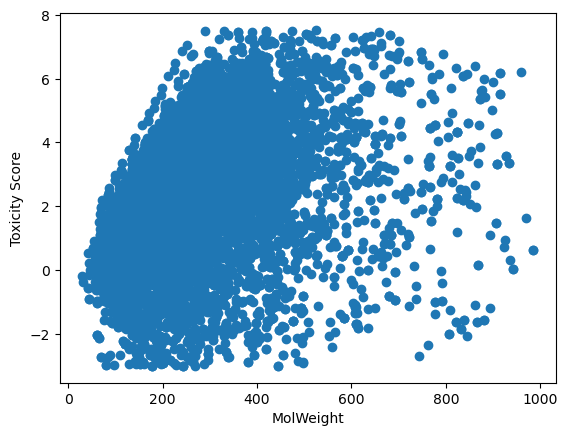

In [24]:
plt.scatter(df['MolWeight'], df['toxicity_score'])
plt.xlabel('MolWeight')
plt.ylabel('Toxicity Score')
plt.show()